<a href="https://colab.research.google.com/github/MahmoodAhmad1/ProgrammingAssignment2/blob/master/Star_rating_predection_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#star rating predection
#Mahmood Ahmad
#Muhammad Awais
#Muhammad Zubair

In [ ]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import *
from dtreeviz.trees import *
from IPython.display import Image, display_svg, SVG


**Reading data**

In [ ]:
%load_ext google.colab.data_table
data=pd.read_csv('/content/Musical_instruments_reviews.csv')


The google.colab.data_table extension is already loaded. To reload it, use:
  %reload_ext google.colab.data_table


#**Basic data analysis**

In [ ]:
#Ensure file reading 
data.head()

In [ ]:
#Total Rows & Columns
data.shape

(10261, 9)

In [ ]:
data.describe()

In [ ]:
#check missing values
null= data.isnull()
null.sum()

reviewerID         0
asin               0
reviewerName      27
helpful            0
reviewText         7
overall            0
summary            0
unixReviewTime     0
reviewTime         0
dtype: int64

In [ ]:
#columns description 
data.columns

In [ ]:
#index for  dataset
data.index

RangeIndex(start=0, stop=10261, step=1)

In [ ]:
#info of  dataset columns
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10261 entries, 0 to 10260
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   reviewerID      10261 non-null  object 
 1   asin            10261 non-null  object 
 2   reviewerName    10234 non-null  object 
 3   helpful         10261 non-null  object 
 4   reviewText      10254 non-null  object 
 5   overall         10261 non-null  float64
 6   summary         10261 non-null  object 
 7   unixReviewTime  10261 non-null  int64  
 8   reviewTime      10261 non-null  object 
dtypes: float64(1), int64(1), object(7)
memory usage: 721.6+ KB


In [ ]:
df['overall'].value_counts()

5.0    6938
4.0    2084
3.0     772
2.0     250
1.0     217
Name: overall, dtype: int64

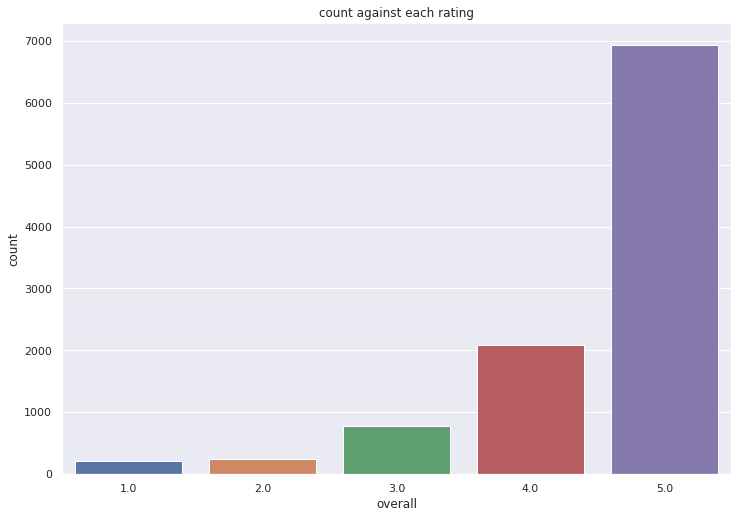

In [ ]:
sns.countplot(x='overall', data=data)  
sns.set(rc={'figure.figsize':(12,8.3)})        #each season match count
plt.title('count against each rating')
plt.show()

#installing Preprocessing Text Python Package

In [ ]:
! pip install git+https://github.com/laxmimerit/preprocess_kgptalkie.git --upgrade --force-reinstall



  Cloning https://github.com/laxmimerit/preprocess_kgptalkie.git to /tmp/pip-req-build-m9m4_iek
  Running command git clone -q https://github.com/laxmimerit/preprocess_kgptalkie.git /tmp/pip-req-build-m9m4_iek
  Created wheel for preprocess-kgptalkie: filename=preprocess_kgptalkie-0.1.3-cp37-none-any.whl size=11759 sha256=e4581eeb0b0c5ed8dff850b284c1bc50bc60f4c2088148e46aa11fac13148c61
  Stored in directory: /tmp/pip-ephem-wheel-cache-hog_u70j/wheels/a8/18/22/90afa4bd43247fb9a75b710a4a3fcd94966c022ce9e3c7d0a6
Successfully built preprocess-kgptalkie


**Taking only two column :user comment and rating**

In [ ]:
df=pd.read_csv('/content/Musical_instruments_reviews.csv',usecols=['reviewText','overall'])

#preprocessing

In [ ]:
import preprocess_kgptalkie as ps
import re

In [ ]:
def get_clean(x):
    x = str(x).lower().replace('\\', '').replace('_', ' ')
    x = ps.cont_exp(x)
    x = ps.remove_emails(x)
    x = ps.remove_urls(x)
    x = ps.remove_html_tags(x)
    x = ps.remove_rt(x)
    x = ps.remove_accented_chars(x)
    x = ps.remove_special_chars(x)
    x = re.sub("(.)\\1{2,}", "\\1", x)
    return x

In [ ]:
df['reviewText']=df['reviewText'].apply(lambda x : get_clean(x))

In [ ]:
df.head()

,reviewText,overall
0,not much to write about here but it does exact...,5.0
1,the product does exactly as it should and is q...,5.0
2,the primary job of this device is to block the...,5.0
3,nice windscreen protects my mxl mic and preven...,5.0
4,this pop filter is great it looks and performs...,5.0


#TFIDF and Linear SVM

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report

In [ ]:
tfidf = TfidfVectorizer(max_features=20000 ,ngram_range=(1,5),analyzer='char')

In [ ]:
X=tfidf.fit_transform(df['reviewText'])
Y=df['overall']

In [ ]:
X.shape ,Y.shape

((10261, 20000), (10261,))

In [ ]:
X_train,X_test,Y_train,Y_test =train_test_split(X,Y,test_size=0.2 ,random_state=0)

In [ ]:
X_train.shape ,Y_train.shape

((8208, 20000), (8208,))

In [ ]:
clf=LinearSVC(C=10,class_weight='balanced')
clf.fit(X_train,Y_train)

LinearSVC(C=10, class_weight='balanced', dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

In [ ]:
Y_pred=clf.predict(X_test)

In [ ]:
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

         1.0       0.35      0.23      0.28        39
         2.0       0.19      0.11      0.14        55
         3.0       0.24      0.30      0.27       134
         4.0       0.35      0.33      0.34       451
         5.0       0.78      0.79      0.78      1374

    accuracy                           0.63      2053
   macro avg       0.38      0.35      0.36      2053
weighted avg       0.62      0.63      0.63      2053



#TFIDDF and Random forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
Rf=RandomForestClassifier(n_estimators=100,class_weight='balanced')

In [ ]:
Rf.fit(X_train,Y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
Rf_pred=Rf.predict(X_test)

In [ ]:
print(classification_report(Y_test,Rf_pred))

              precision    recall  f1-score   support

         1.0       1.00      0.03      0.05        39
         2.0       0.00      0.00      0.00        55
         3.0       1.00      0.01      0.01       134
         4.0       0.50      0.00      0.00       451
         5.0       0.67      1.00      0.80      1374

    accuracy                           0.67      2053
   macro avg       0.63      0.21      0.17      2053
weighted avg       0.64      0.67      0.54      2053



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#TFIDF and KNeighborsClassifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
k=1
knn=KNeighborsClassifier(n_neighbors=k ,metric='minkowski',weights='uniform')

In [ ]:
knn.fit(X_train,Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [ ]:
knn_pred=knn.predict(X_test)

In [ ]:
print(classification_report(Y_test,knn_pred))

              precision    recall  f1-score   support

         1.0       0.19      0.08      0.11        39
         2.0       0.04      0.09      0.05        55
         3.0       0.10      0.19      0.13       134
         4.0       0.20      0.15      0.17       451
         5.0       0.67      0.64      0.66      1374

    accuracy                           0.48      2053
   macro avg       0.24      0.23      0.22      2053
weighted avg       0.50      0.48      0.49      2053



#TFIDF and LogisticRegression

> Indented block



In [ ]:
from sklearn.linear_model import LogisticRegression
nb = LogisticRegression(C=20,class_weight='balanced')

In [ ]:
nb.fit(X_train,Y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=20, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
nb_pred=nb.predict(X_test)

In [ ]:
print(classification_report(Y_test,nb_pred))

              precision    recall  f1-score   support

         1.0       0.26      0.36      0.30        39
         2.0       0.18      0.15      0.16        55
         3.0       0.22      0.40      0.28       134
         4.0       0.33      0.39      0.36       451
         5.0       0.81      0.70      0.75      1374

    accuracy                           0.59      2053
   macro avg       0.36      0.40      0.37      2053
weighted avg       0.64      0.59      0.61      2053



#TFIDF and Decsion Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()

In [ ]:
dt.fit(X_train,Y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
dt_pred=dt.predict(X_test)

In [ ]:
print(classification_report(Y_test,dt_pred))

              precision    recall  f1-score   support

         1.0       0.10      0.10      0.10        39
         2.0       0.05      0.04      0.04        55
         3.0       0.10      0.13      0.11       134
         4.0       0.25      0.23      0.24       451
         5.0       0.71      0.72      0.72      1374

    accuracy                           0.54      2053
   macro avg       0.24      0.24      0.24      2053
weighted avg       0.54      0.54      0.54      2053



#visulation

#Test


In [ ]:
t='this is really good product'
t=get_clean(t)
vec=tfidf.transform([t])
clf.predict(vec)

array([5.])

In [ ]:
t='this is really bad .i do not like it'
t=get_clean(t)
vec=tfidf.transform([t])
clf.predict(vec)

array([1.])